In [0]:
from google.colab import drive
drive.mount('/gdrive')

In [0]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms

In [0]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
print(trainset)
print(trainloader)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [0]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [0]:
print(images[0].shape)
print(images[0])


torch.Size([3, 32, 32])
tensor([[[0.9961, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9882, 1.0000, 0.9686,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9765, 0.6902,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9961, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9804, 0.9216,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9333, 0.6235,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9961, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 0.9922, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
         [0.9843, 0.9647, 0.9176,  ..., 1.0000, 1.0000, 1.0000],
         [0.9843, 0.9255, 0.6510, 

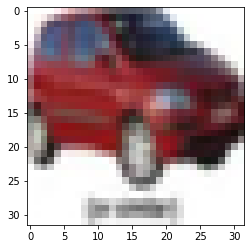

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

imshow(images[0])

Albumentations workout

In [1]:
from PIL import Image
import torch
import cv2
import numpy as np
from torch.utils.data import Dataset
import torchvision

!pip install -U git+https://github.com/albu/albumentations --no-cache-dir
from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize, RandomBrightnessContrast, Cutout, CoarseDropout, GaussNoise
from albumentations.pytorch import ToTensor

import albumentations
print(albumentations.__version__)


  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-458qd3vd
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-458qd3vd
     |████████████████████████████████| 634kB 2.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=c640eb36a5ff8394fa61093504e72c33317b853a27ccef16b39700e1ec7f1327
  Stored in directory: /tmp/pip-ephem-wheel-cache-w1ffqpoc/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=859c6afc0c3fff53c0e512b5fdd9ae4b356c63293a1aaab91bb5e30cee3989d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-w1ffqpoc/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: album

In [0]:
def album_calculate_dataset_mean_std():
    trainset = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=ToTensor())
    testset = torchvision.datasets.CIFAR10('./data', train=False, download=True, transform=ToTensor())

    data = np.concatenate([trainset.data, testset.data], axis=0)
    data = data.astype(np.float32)/255.

    print("\nTotal dataset(train+test) shape: ", data.shape)

    means = []
    stdevs = []
    for i in range(3): # 3 channels
        pixels = data[:,:,:,i].ravel()
        means.append(np.mean(pixels))
        stdevs.append(np.std(pixels))

    return [means[0], means[1], means[2]], [stdevs[0], stdevs[1], stdevs[2]]

In [3]:
print(album_calculate_dataset_mean_std())


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified

Total dataset(train+test) shape:  (60000, 32, 32, 3)
([0.49186864, 0.48265335, 0.44717798], [0.24697131, 0.24338901, 0.26159254])


In [0]:
class album_compose:
  def __init__(self, settype):
    self.settype = settype
    transform_items = []
    if self.settype == 'train':
      print("Train set")
      self.albumentation_transform = Compose([
              RandomBrightnessContrast(always_apply=False, p=1.0, brightness_limit=(-0.20, 0.32), contrast_limit=(-0.20, 0.32), brightness_by_max=True),
              HorizontalFlip(),
              # Cutout(always_apply=False, p=1.0, num_holes=2, max_h_size=6, max_w_size=6, fill_value=[0.5*255,0.5*255,0.5*255]),
              GaussNoise(always_apply=False, p=1.0, var_limit=(30, 50)),
              CoarseDropout(max_holes=3, max_height=10, max_width=8, min_holes=2, min_height=6, min_width=6, fill_value=[0.5*255,0.5*255,0.5*255], always_apply=False, p=1.0),
              Normalize(
                  mean = [0.5, 0.5, 0.5],
                  std = [0.5, 0.5, 0.5],
              ),
              ToTensor()
      ])
    elif self.settype == 'test':
      print("Test set")
      self.albumentation_transform = Compose([
              Normalize(
                  mean = [0.5, 0.5, 0.5],
                  std = [0.5, 0.5, 0.5],
              ),
              ToTensor()
      ])

  def __call__(self, img):
    img = np.array(img)
    img = self.albumentation_transform(image=img)['image']
    return img


In [32]:
albumentation_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=album_compose("train"))
albumentation_trainloader = torch.utils.data.DataLoader(albumentation_trainset, batch_size=4, shuffle=True, num_workers=2)

Train set
Files already downloaded and verified


In [33]:
print(albumentation_trainset)
print(albumentation_trainloader)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: <__main__.album_compose object at 0x7f7aa7f36b38>


In [0]:
# get some random training images
dataiter = iter(albumentation_trainloader)
images, labels = dataiter.next()

In [35]:
print(images[0].shape)
print(images[0])
print(labels[0])

torch.Size([3, 32, 32])
tensor([[[-0.1765, -0.2157, -0.2235,  ..., -0.0118, -0.1294, -0.0745],
         [-0.2000, -0.2000, -0.1529,  ..., -0.0118,  0.0118,  0.0588],
         [-0.0118, -0.2078, -0.1529,  ...,  0.1137,  0.0980,  0.0353],
         ...,
         [ 0.5686,  0.4902,  0.5059,  ...,  0.4902,  0.4588,  0.5922],
         [ 0.6000,  0.5451,  0.5922,  ...,  0.5294,  0.6627,  0.6549],
         [ 0.5216,  0.5059,  0.5059,  ...,  0.6078,  0.5294,  0.4980]],

        [[ 0.1059,  0.2157,  0.2078,  ...,  0.3882,  0.3882,  0.3882],
         [ 0.1843,  0.2627,  0.2549,  ...,  0.4902,  0.4196,  0.3882],
         [ 0.2157,  0.2392,  0.2706,  ...,  0.5686,  0.4196,  0.5216],
         ...,
         [ 0.3098,  0.3804,  0.2392,  ...,  0.2549,  0.3255,  0.3647],
         [ 0.2784,  0.3020,  0.2392,  ...,  0.3255,  0.3804,  0.3412],
         [ 0.3333,  0.3255,  0.2863,  ...,  0.2627,  0.3098,  0.3804]],

        [[ 0.6941,  0.5686,  0.6392,  ...,  0.9059,  0.8902,  0.8510],
         [ 0.7412,  0

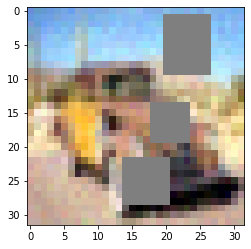

In [36]:
import matplotlib.pyplot as plt
def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

imshow(images[0])

NameError: ignored

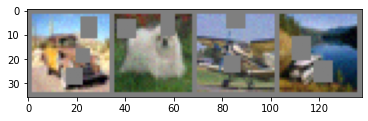

In [37]:
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))